<a href="https://colab.research.google.com/github/ShahrukhGouhar/Prediction-of-CO-and-NOX-WebApp/blob/main/Gas_Turbine_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT DESCRIPTION


**OBJECTIVE**: Prediction of Gas Turbine CO and NOx Emission 

**Description**: Predict the Gas Turbine CO and NOx Emission using 11 sensor measures aggregated over one hour (by means of average orsum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions,namely CO and NOx (NO + NO2)

**Motivation**: Harmful effect of Flue gas emitted from power plant turbines on environment has always been a substantial concern. In the recent past years many peaceful protest to save environment has been seen. Environmental organization that seeks to protect, analyse or monitor the environment have conducted many events and activities to raise people awareness on environment.
This project aims to predict emission of flue gases based on sensor data from gas turbine and various Machine Learning techniques. 

The ML model can be used to predict/estimate amount of emission for future operations of Turbine and Turbine of same homologus series. Model output can also be used for validation and backing up of costly continuous emission monitoring systems used in gas-turbine-based power plants. Their implementation relies on the availability of appropriate and ecologically valid data.

**Data Source**: https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set#

**Data Description:** The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2).

 **Variable (Abbr.)  &  Unit**

Ambient temperature (AT) C 

Ambient pressure (AP) mbar 

Ambient humidity (AH) (%) 

Air filter difference pressure (AFDP) mbar

Gas turbine exhaust pressure (GTEP) mbar 

Turbine inlet temperature (TIT) C 

Turbine after temperature (TAT) C 

Compressor discharge pressure (CDP) mbar 

Turbine energy yield (TEY) MWH 

Carbon monoxide (CO) mg/m^3

 Nitrogen oxides (NOx) mg/m^3

# Library Import

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display

# Loading file

In [ ]:
# path of each file
path_train_CO = ("/content/drive/MyDrive/Colab Notebooks/Stats_AND_ML_Projects/"
        "ML_Project/Gas Turbine CO and NOx Emission Data Set Data Set/"
        "pp_gas_emission/train_CO.csv")

path_CV_CO = ("/content/drive/MyDrive/Colab Notebooks/Stats_AND_ML_Projects/"
        "ML_Project/Gas Turbine CO and NOx Emission Data Set Data Set/"
        "pp_gas_emission/CV_CO.csv")

# ===========================================================

df_train_CO = pd.read_csv(path_train_CO)
df_CV_CO = pd.read_csv(path_CV_CO)

In [ ]:
display(df_train_CO.info())
display(df_CV_CO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14483 entries, 0 to 14482
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      14483 non-null  float64
 1   AP      14483 non-null  float64
 2   AH      14483 non-null  float64
 3   AFDP    14483 non-null  float64
 4   GTEP    14483 non-null  float64
 5   TIT     14483 non-null  float64
 6   TAT     14483 non-null  float64
 7   TEY     14483 non-null  float64
 8   CDP     14483 non-null  float64
 9   CO      14483 non-null  float64
 10  NOX     14483 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7628 non-null   float64
 1   AP      7628 non-null   float64
 2   AH      7628 non-null   float64
 3   AFDP    7628 non-null   float64
 4   GTEP    7628 non-null   float64
 5   TIT     7628 non-null   float64
 6   TAT     7628 non-null   float64
 7   TEY     7628 non-null   float64
 8   CDP     7628 non-null   float64
 9   CO      7628 non-null   float64
 10  NOX     7628 non-null   float64
dtypes: float64(11)
memory usage: 655.7 KB


None

In [ ]:
# All attributes are of float data type and none has null values
print(df_train_CO.isnull().sum().sum(),df_CV_CO.isnull().sum().sum())

0 0


# Statistical Analysis

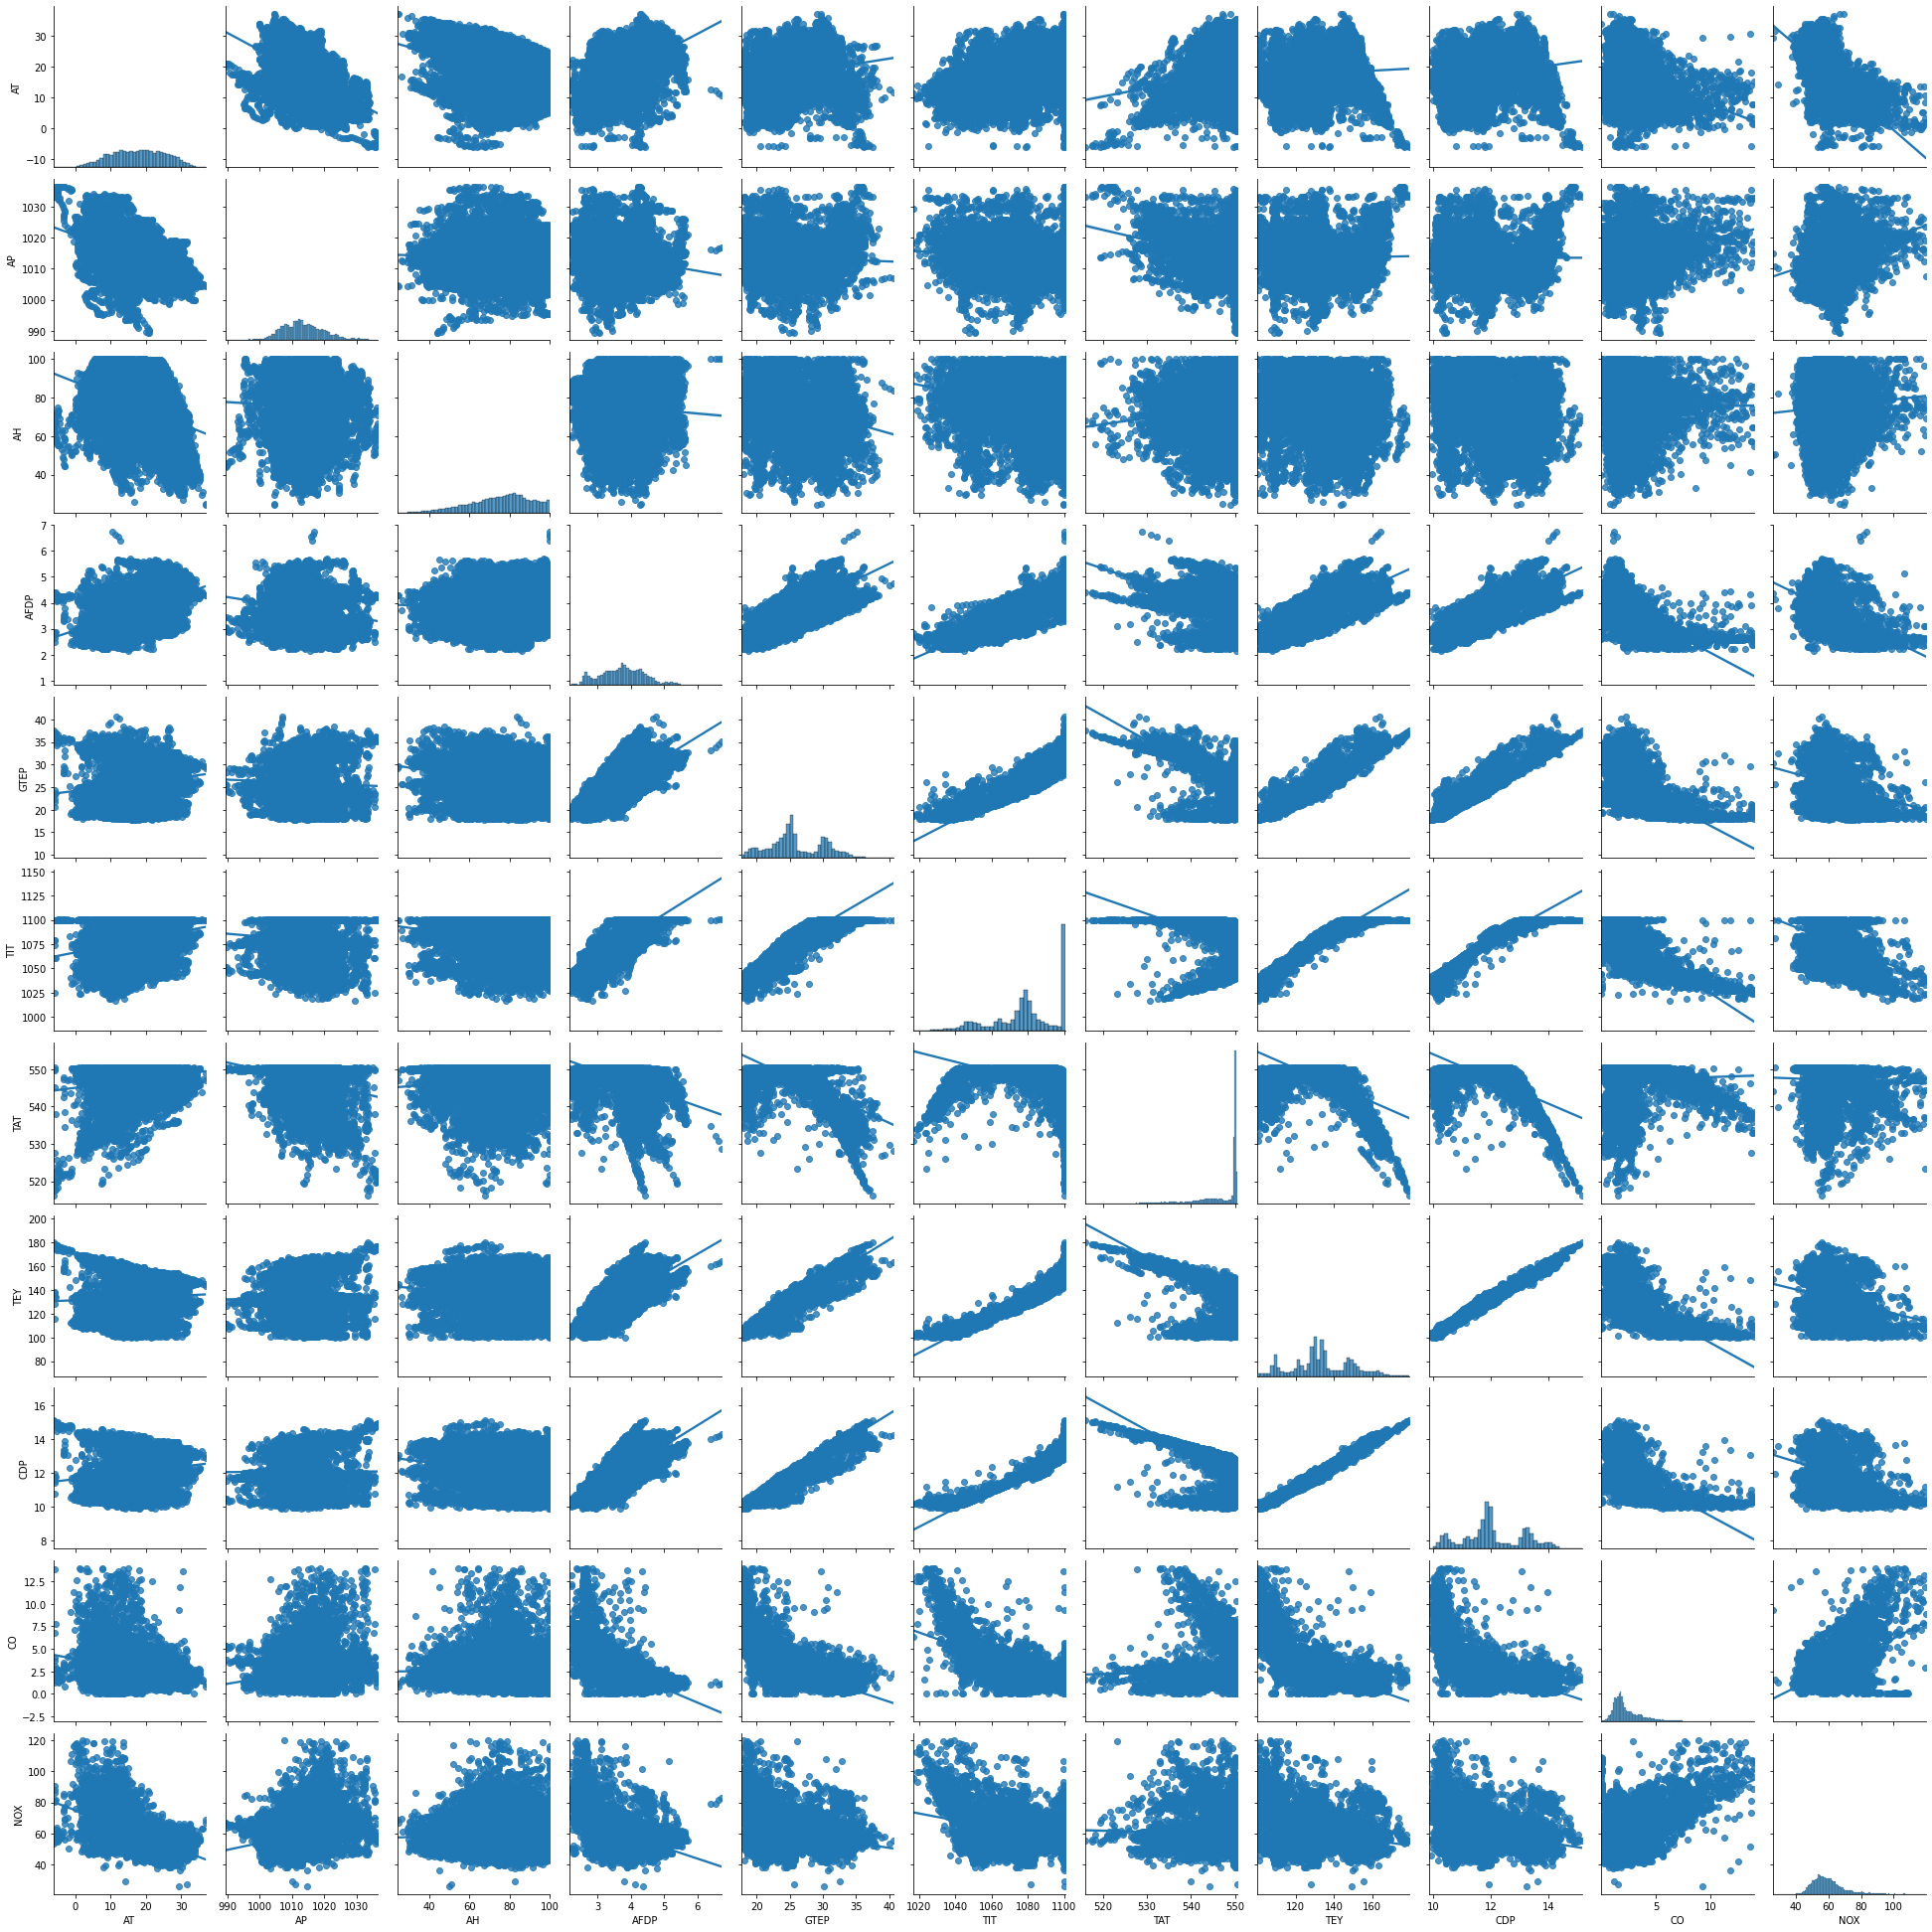

In [ ]:
sns.pairplot(data = df_train_CO,kind='reg')

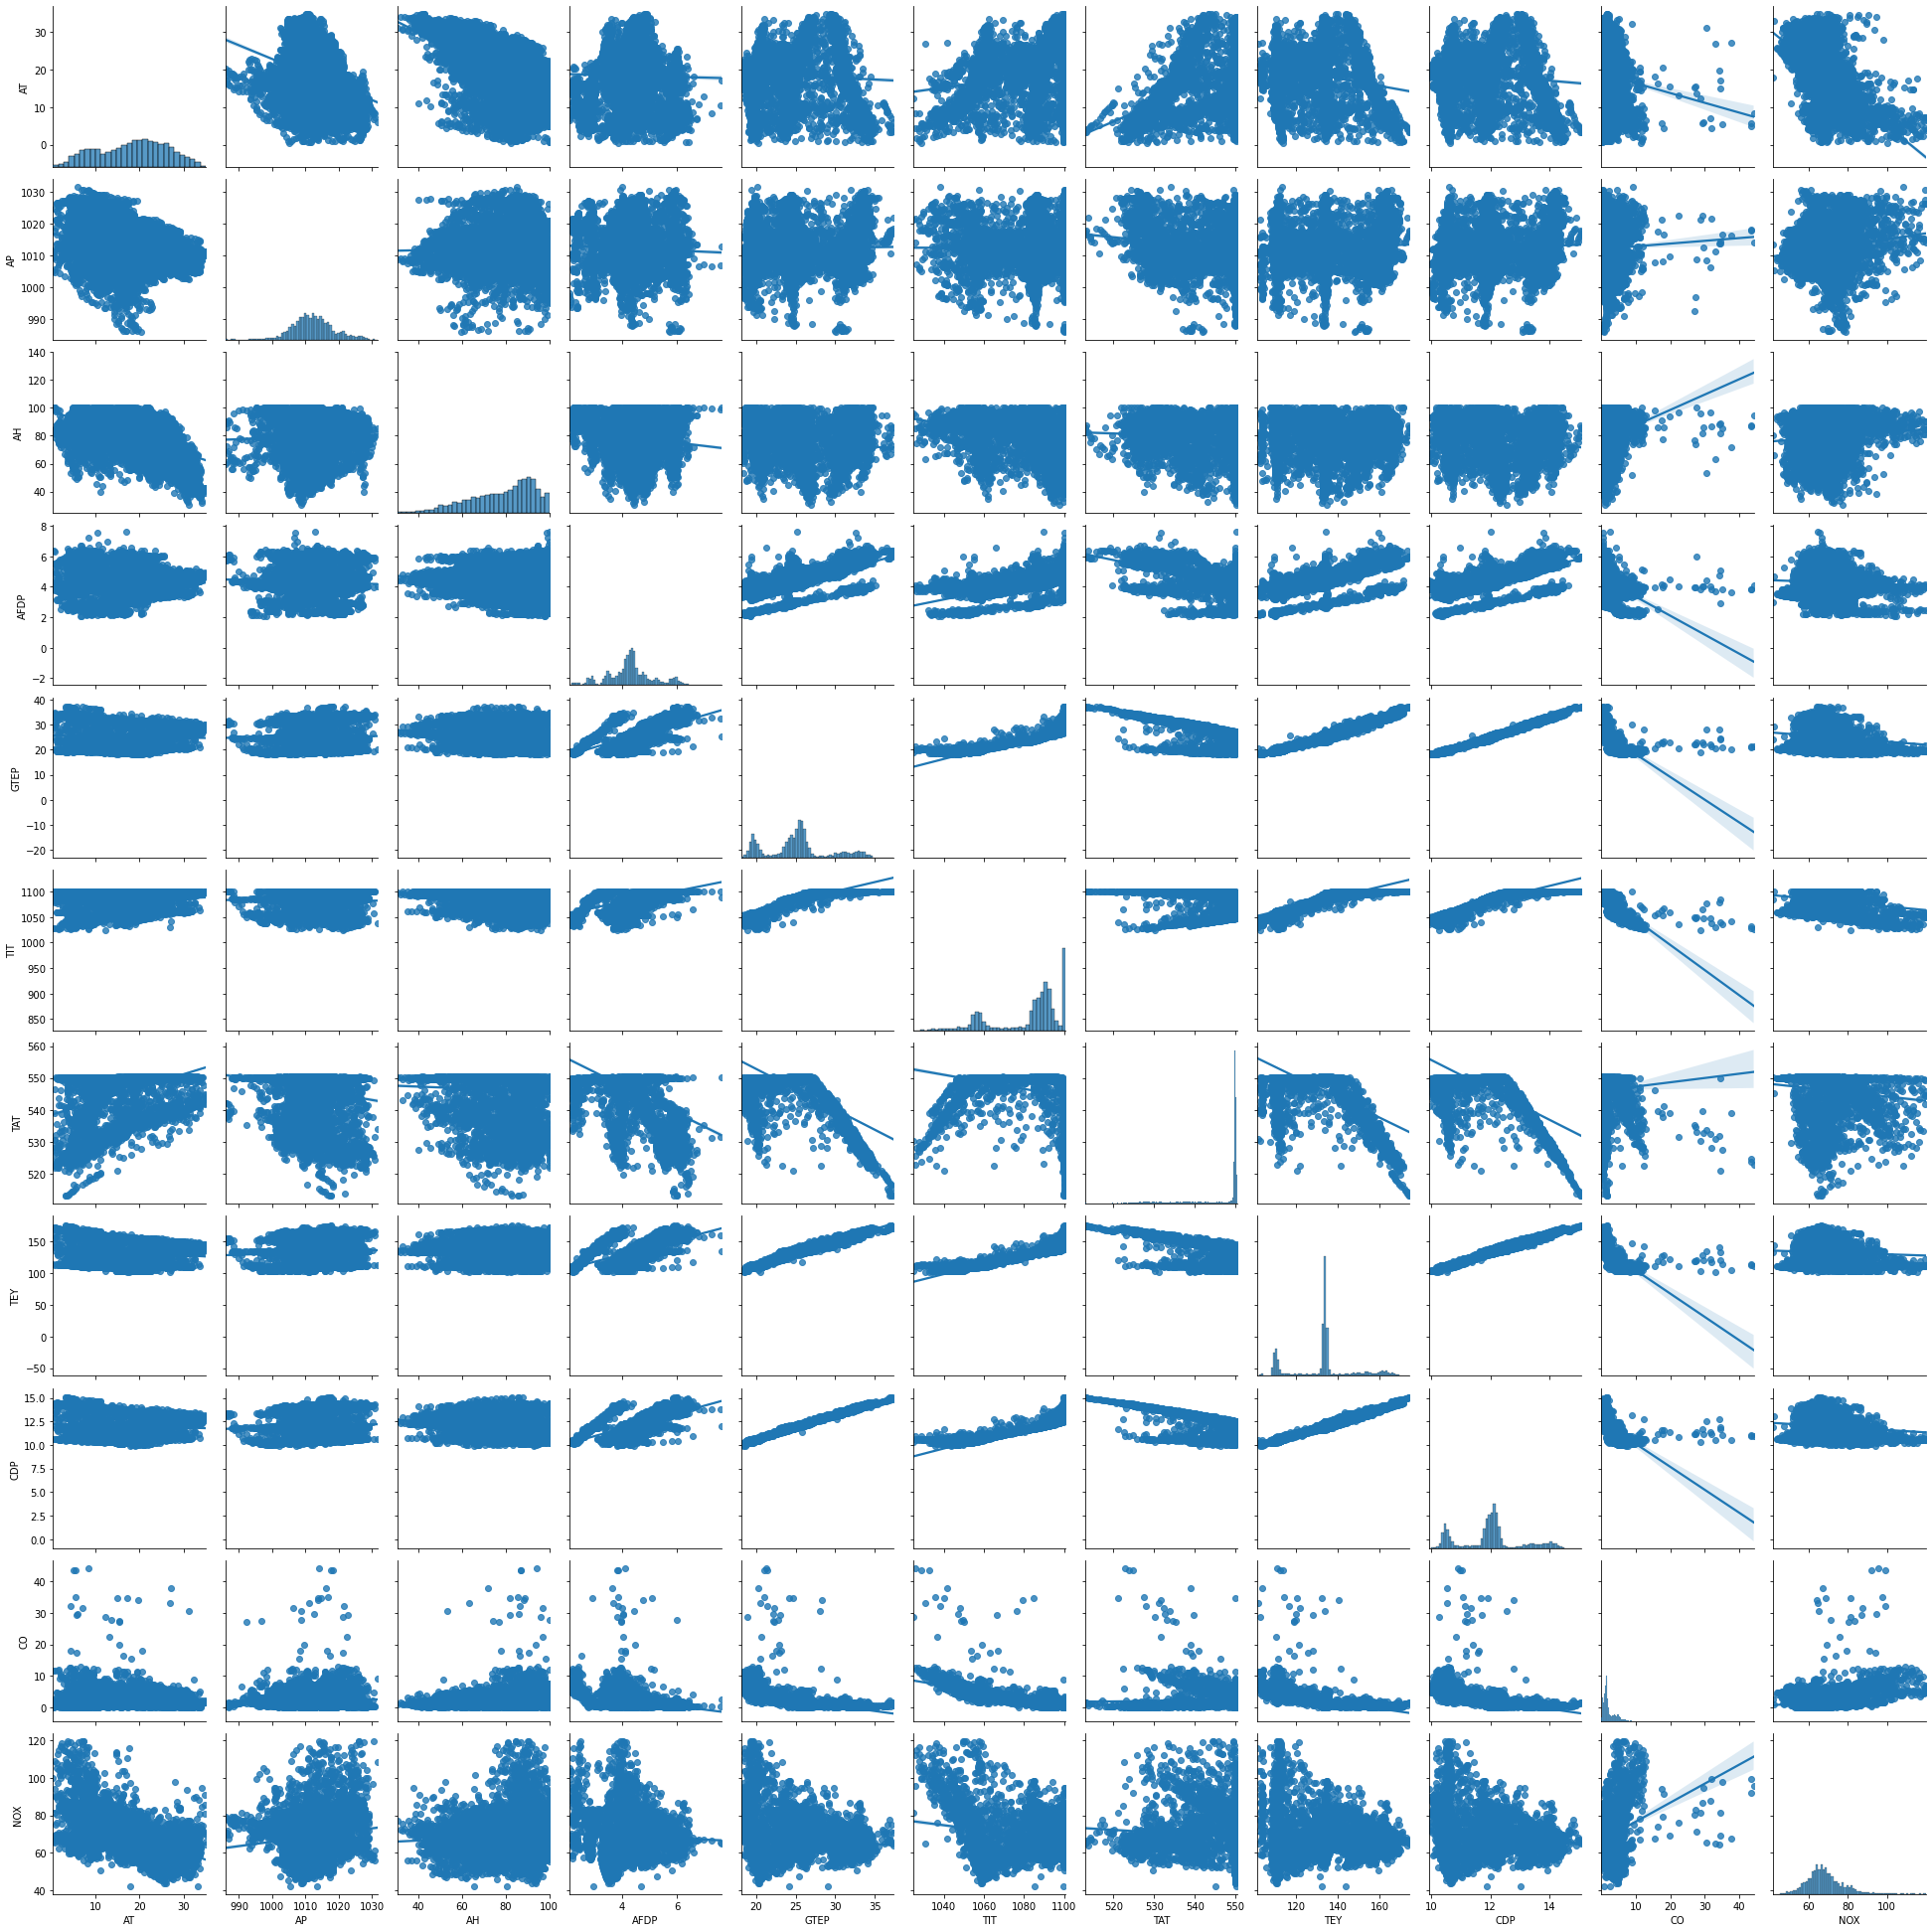

In [ ]:
sns.pairplot(data = df_CV_CO,kind='reg')

In [ ]:
df_train_CO.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000
mean,17.731693,1013.447010,75.287391,3.756525,25.958081,1079.091928,547.183027,133.551063,12.066248,2.538050,59.863799
std,7.591136,6.538122,14.891502,0.679749,4.100955,17.999316,5.024444,14.911638,1.046398,1.792677,10.368606
min,-6.234800,989.400000,24.085000,2.151700,17.698000,1016.700000,516.040000,100.020000,9.851800,0.001640,25.905000
25%,11.990500,1008.800000,65.612500,3.278350,23.328500,1070.300000,545.660000,125.000000,11.466000,1.466300,53.023000
50%,17.910000,1012.800000,77.060000,3.762100,25.231000,1079.500000,549.850000,132.750000,11.916000,1.951600,58.090000
75%,23.711000,1017.400000,86.318000,4.232900,29.772500,1099.600000,550.040000,146.060000,13.067000,3.092050,64.240000
max,37.103000,1036.600000,100.100000,6.738600,40.716000,1100.900000,550.600000,179.500000,15.159000,13.992000,119.680000


In [ ]:
df_CV_CO.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000
mean,18.397950,1012.258153,79.074804,4.306717,25.181361,1082.890233,546.263793,132.675552,12.000121,2.361133,68.788965
std,7.661038,6.384291,14.105087,0.831170,4.006825,16.852148,7.331345,15.302140,1.049384,2.474116,10.224937
min,0.522300,985.850000,30.344000,2.087400,18.100000,1024.600000,513.060000,101.150000,9.928600,0.007505,41.777000
25%,12.269250,1008.400000,69.165250,3.882650,23.090750,1075.800000,547.657500,125.240000,11.469750,1.127125,62.531250
50%,19.120500,1012.000000,82.411500,4.298050,25.221000,1089.100000,549.920000,133.760000,12.041000,1.636300,67.246500
75%,24.337250,1016.000000,90.356250,4.670525,26.322250,1093.800000,550.070000,134.900000,12.290000,2.953025,73.424500
max,34.929000,1031.800000,100.200000,7.610600,37.402000,1100.800000,550.530000,174.610000,15.081000,44.103000,119.890000


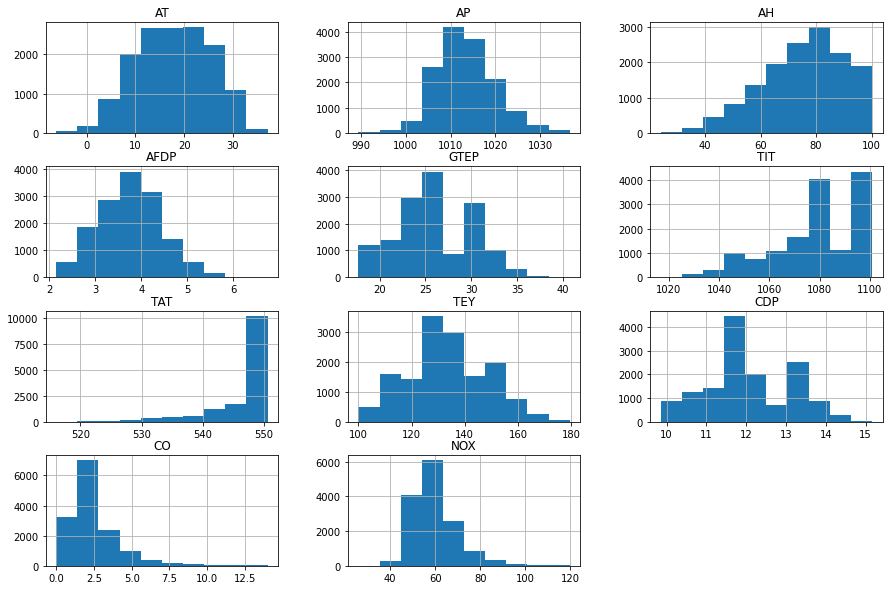

In [ ]:
df_train_CO.hist(figsize=(15,10))
plt.show()

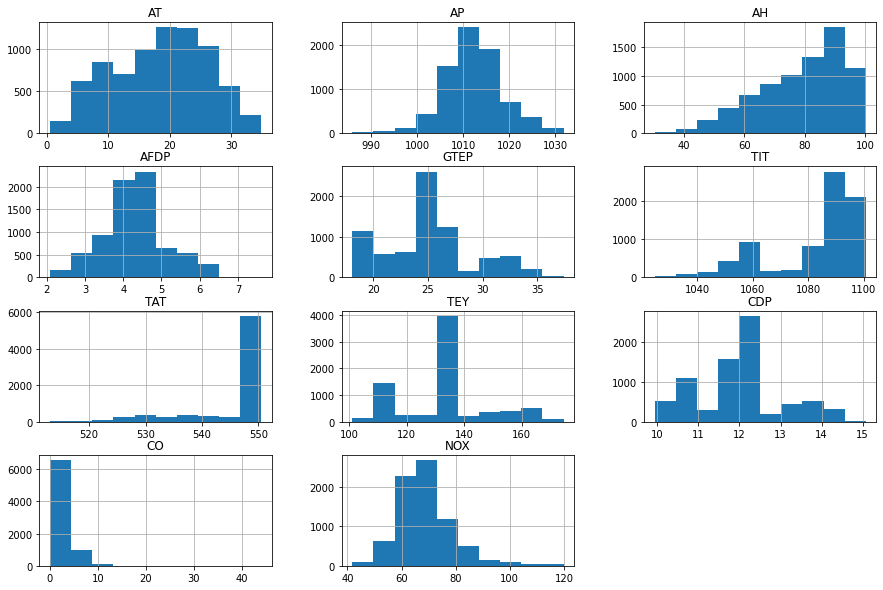

In [ ]:
df_CV_CO.hist(figsize=(15,10))
plt.show()

# Modelling

## CO PREDICTION

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

### Feature and Target Variable split data

In [ ]:
# Shuffling Data
df_train_CO = shuffle(df_train_CO)
print(df_train_CO.shape)
# =============================================

# ========Selecting predictor columns==========

X_cols = df_train_CO.drop(columns=['AP','TIT', 'AT','AH',"CO",'NOX']).columns[:] # as per paper
y_cols = df_train_CO.columns[-2]
#==============================================

# =============data slicing====================
# train data
dfX_tr = df_train_CO.loc[:,X_cols]
dfY_tr = df_train_CO.loc[:,y_cols]

# CV data
dfX_CV = df_CV_CO.loc[:,X_cols]
dfY_CV = df_CV_CO.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scaler = StandardScaler()
scaler.fit(dfX_tr)
dfX_tr_t = scaler.transform(dfX_tr)
dfX_tr = pd.DataFrame(data = dfX_tr_t, columns=X_cols).reset_index(drop=True)

# CV data Scale
dfX_CV_t = scaler.transform(dfX_CV)
dfX_CV = pd.DataFrame(data = dfX_CV_t, columns=X_cols).reset_index(drop=True)

#==============================================
print(dfX_tr.shape,dfY_tr.shape,dfX_CV.shape,dfY_CV.shape)
y_cols

(14483, 11)
(14483, 5) (14483,) (7628, 5) (7628,)


'CO'

In [ ]:
dfX_tr.head(2)

,AFDP,GTEP,TAT,TEY,CDP
0,-0.942770,-0.941784,0.628345,-0.695525,-0.861316
1,-0.020927,-0.197542,0.616402,-0.042322,-0.084338


In [ ]:
# Polynomial features transformation
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(dfX_tr)
dfX_tr = poly.transform(dfX_tr)

poly2 = PolynomialFeatures(degree=deg)
poly2.fit(dfX_CV)
dfX_CV = poly2.transform(dfX_CV)
dfX_tr.shape, dfX_CV.shape

((14483, 21), (7628, 21))

### Linear Regression

In [ ]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(dfX_tr,dfY_tr)

yhat = lr.predict(dfX_tr)  # prediction on train data
yhat_CV = lr.predict(dfX_CV) # prediction on CV data

mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV

R_tr = r2_score(dfY_tr,yhat)  # train R_square
R_CV = r2_score(dfY_CV, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)


lr.coef_

RMSE train    :  0.91140803086399 	RMSE CV      :  1.5704539647297626
R_square train:  0.7415052031112856 	R_square CV  :  0.5970352182217877
Adjusted_R_square train:  0.7411298216898996 	Adjusted_R_square CV  :  0.5959226412539541


array([ 0.        , -0.23522793, -1.12214944, -1.06312341,  0.09973529,
       -0.20387311, -0.08455992, -0.65897816, -0.00546513, -2.09055588,
        2.76388905,  1.25683696,  0.11193755,  1.87910699, -3.57370128,
        0.09022303,  0.09427365,  0.5728058 , -1.47061358,  3.0150459 ,
       -0.38867647])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


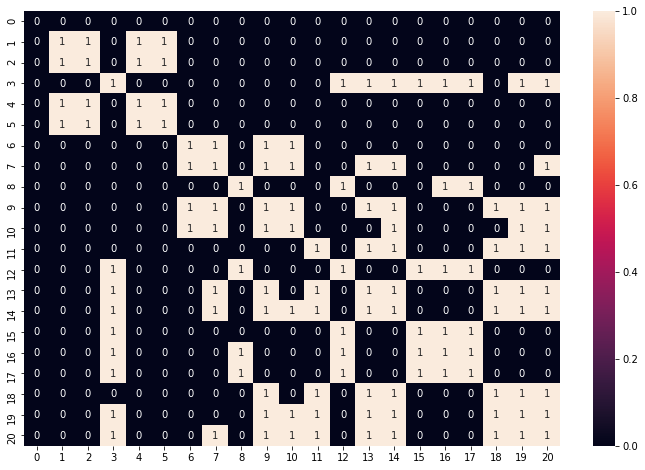

In [ ]:
plt.figure(figsize=(12,8))
corr_mat = np.corrcoef(dfX_tr,rowvar=False)
sns.heatmap(abs(corr_mat)>0.7,annot=True)

[20.44731024  6.17547374  2.72838743  1.19732015  0.88201569]
(14483, 5)


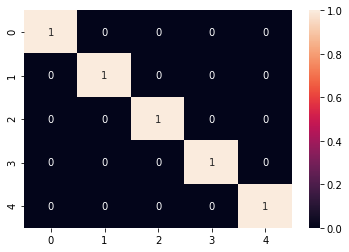

In [ ]:
decom = PCA(n_components=5)
decom.fit(dfX_tr)
dfX_tr = decom.transform(dfX_tr)
dfX_CV = decom.transform(dfX_CV)
print(decom.explained_variance_)
sns.heatmap(np.corrcoef(dfX_tr, rowvar=False)>0.1,annot=True)
print(dfX_tr.shape)

In [ ]:
# Linear Regression
lr = LinearRegression(fit_intercept=True,normalize=False)
lr.fit(dfX_tr,dfY_tr)

yhat = lr.predict(dfX_tr)  # prediction on train data
yhat_CV = lr.predict(dfX_CV) # prediction on CV data

mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV

R_tr = r2_score(dfY_tr,yhat)  # train R_square
R_CV = r2_score(dfY_CV, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

lr.coef_

RMSE train    :  0.9869686208908793 	RMSE CV      :  1.6422458557399138
R_square train:  0.6968672955923907 	R_square CV  :  0.5593507654837493
Adjusted_R_square train:  0.696762601006355 	Adjusted_R_square CV  :  0.5590617014359165


array([ 0.01619918,  0.50158962, -0.42348079, -0.14818516,  0.43233251])

### Ridge Regression


In [ ]:
# Ridge Regression
mse_tr_list = []
mse_CV_list = []

R_tr_list = []
R_CV_list = []
A_R_tr_list = []
A_R_CV_list = []

for alpha in range(0,100):
    lr = Ridge(alpha=alpha, fit_intercept=True,max_iter=None, solver='auto')
    lr.fit(dfX_tr,dfY_tr)

    yhat = lr.predict(dfX_tr)  # prediction on train data
    yhat_CV = lr.predict(dfX_CV) # prediction on CV data


    mse = mean_squared_error(yhat, dfY_tr)  # MSE train
    mse_tr_list.append(mse)

    mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV
    mse_CV_list.append(mse_CV)


    R_tr = lr.score(dfX_tr,dfY_tr)  # train R_square
    R_tr_list.append(R_tr)

    R_CV = lr.score(dfX_CV,dfY_CV)  # CV R_square
    R_CV_list.append(R_CV)

    # Adjusted R_squared

    A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
    A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square
    A_R_tr_list.append(A_R_tr)
    A_R_CV_list.append(A_R_CV)


print("MSE_tr",mse_tr_list.index(min(mse_tr_list)), min(mse_tr_list))
print("MSE_CV",mse_CV_list.index(min(mse_CV_list)), min(mse_CV_list))
print("R_train",R_tr_list.index(max(R_tr_list)), max(R_tr_list))
print("R_CV",R_CV_list.index(max(R_CV_list)), max(R_CV_list))
print("Adjusted R_train",A_R_tr_list.index(max(A_R_tr_list)), max(A_R_tr_list))
print("Adjusted_R_CV",A_R_CV_list.index(max(A_R_CV_list)), max(A_R_CV_list))


MSE_tr 0 0.9741070586232442
MSE_CV 0 2.6969714506949196
R_train 0 0.6968672955923907
R_CV 0 0.5593507654837495
Adjusted R_train 0 0.696762601006355
Adjusted_R_CV 0 0.5590617014359167


### Decision Tree

In [ ]:
# Decision Tree regression model
dtr = DecisionTreeRegressor(max_depth=4, criterion='mse', random_state=126865488)
dtr.fit(dfX_tr,dfY_tr)

mse = mean_squared_error(dfY_tr,dtr.predict(dfX_tr))
mse_CV = mean_squared_error(dfY_CV,dtr.predict(dfX_CV))
R_tr = dtr.score(dfX_tr,dfY_tr)  # train R_square
R_CV = dtr.score(dfX_CV,dfY_CV)  # CV R_square

# Adjusted R_squared
A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

RMSE train    :  0.917049511776847 	RMSE CV      :  1.9413060473637664
R_square train:  0.7382952099499145 	R_square CV  :  0.3842496240473779
Adjusted_R_square train:  0.7382048235473275 	Adjusted_R_square CV  :  0.38384569438590277


### Random Forest

In [ ]:
# Random forest
R_tr_list = []
R_CV_list = []
for i in range(1,20):
    rfReg = RandomForestRegressor(max_depth=i,n_estimators=100,n_jobs=-1, criterion='mse',
                                warm_start=True,oob_score=True, bootstrap=True,
                                  max_features=3, random_state=126865488)
    rfReg.fit(dfX_tr,dfY_tr)

    R_tr = rfReg.score(dfX_tr,dfY_tr)  # train R_square
    R_tr_list.append(R_tr)
    R_CV = rfReg.score(dfX_CV,dfY_CV)  # CV R_square
    R_CV_list.append(R_CV)
    print(i,"--","R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)

1 -- R_square train:  0.48556395433854144 	R_square CV  :  0.1369906685387754
2 -- R_square train:  0.6403907443893684 	R_square CV  :  0.18444965882168463
3 -- R_square train:  0.7061628018482318 	R_square CV  :  0.26740695597486475
4 -- R_square train:  0.7485503858839756 	R_square CV  :  0.3741212450279283
5 -- R_square train:  0.7754524698033569 	R_square CV  :  0.4269532981655584
6 -- R_square train:  0.799321156919307 	R_square CV  :  0.42649148943222603
7 -- R_square train:  0.8196836759521193 	R_square CV  :  0.42254445888617376
8 -- R_square train:  0.839322587869336 	R_square CV  :  0.41241357664075656
9 -- R_square train:  0.8577772484892747 	R_square CV  :  0.40999310130507227
10 -- R_square train:  0.875335179771839 	R_square CV  :  0.41240180185102787
11 -- R_square train:  0.8904042973750461 	R_square CV  :  0.4094909401179036
12 -- R_square train:  0.904033074972573 	R_square CV  :  0.4181268938470369
13 -- R_square train:  0.9173642121132124 	R_square CV  :  0.41997889

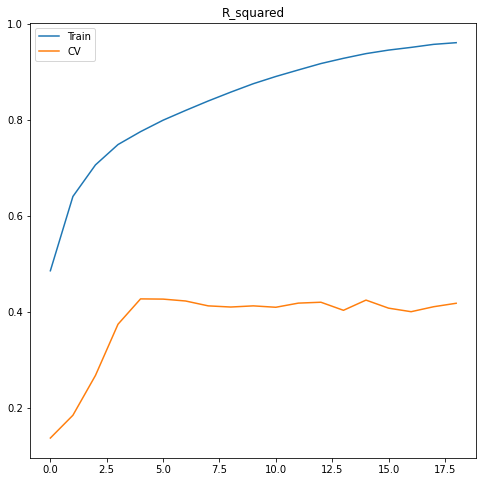

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(R_tr_list)
plt.plot(R_CV_list)
plt.legend(['Train','CV'])
plt.title("R_squared")
plt.show()

### Support Vector

In [ ]:
svRegr = SVR(C=0.06,epsilon=0.1,kernel='linear')
svRegr.fit(dfX_tr, dfY_tr)

R_tr = svRegr.score(dfX_tr,dfY_tr)  # train R_square
R_CV = svRegr.score(dfX_CV,dfY_CV)  # CV R_square


# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

mse = mean_squared_error(dfY_tr,svRegr.predict(dfX_tr))
mse_CV = mean_squared_error(dfY_CV,svRegr.predict(dfX_CV))

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

RMSE train    :  0.9961178548165404 	RMSE CV      :  1.6297665184156565
R_square train:  0.6912211445993335 	R_square CV  :  0.5660222599847571
Adjusted_R_square train:  0.6911144999715098 	Adjusted_R_square CV  :  0.5657375724093077


We found Linear Regression and SVM Regressor  have maximum R_squared value

Linear_Regression --- R_squared = 0.5593

SVM Regressor --- R_squared = 0.5594

We will take our final model as SVM Regressor since it's R_squared is more stable as compared to Linear Regression

### Final training on both train and CV data

From train and CV we found best alogirithm is SVM Regressor. We will see performance of all the models over test data when they are trained over both train and CV but we will take SVM Regressor as Final

In [ ]:
## Data for final training

path_test_CO = ("/content/drive/MyDrive/Colab Notebooks/Stats_AND_ML_Projects/"
        "ML_Project/Gas Turbine CO and NOx Emission Data Set Data Set/"
        "pp_gas_emission/test_CO.csv")

# ===========================================================


# =============loading train data ===================
df_f = pd.concat([df_train_CO, df_CV_CO]).reset_index(drop =True)
print(df_f.shape)

# =============loading test data ===================
df_test_CO = pd.read_csv(path_test_CO)
print(df_test_CO.shape)

#===================================================

# Shuffling Data
df_f = shuffle(df_f)
print(df_f.shape)
# =============================================

# ========Selecting predictor columns==========
X_cols = df_f.drop(columns=['AP','TIT', 'AT','AH','CO','NOX']).columns[:] # as per paper
y_cols = df_f.columns[-2]
#==============================================

# =============data slicing====================
# train data
dfX_f = df_f.loc[:,X_cols]
dfY_f = df_f.loc[:,y_cols]

# test data
dfX_test = df_test_CO.loc[:,X_cols]
dfY_test = df_test_CO.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scalerCO = StandardScaler()
scalerCO.fit(dfX_f)
dfX_f_t = scalerCO.transform(dfX_f)
dfX_f = pd.DataFrame(data = dfX_f_t, columns=X_cols).reset_index(drop=True)


# test data scale
dfX_test_t = scalerCO.transform(dfX_test)
dfX_test = pd.DataFrame(data = dfX_test_t, columns=X_cols).reset_index(drop=True)
#==============================================
print(dfX_f.shape,dfY_f.shape, dfX_test.shape, dfY_test.shape)
y_cols

(22111, 11)
(14563, 11)
(22111, 11)
(22111, 5) (22111,) (14563, 5) (14563,)


'CO'

In [ ]:
X_cols

Index(['AFDP', 'GTEP', 'TAT', 'TEY', 'CDP'], dtype='object')

In [ ]:
# Polynomial features  # Reqired to do this
from sklearn.preprocessing import PolynomialFeatures
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(dfX_f)
dfX_f = poly.transform(dfX_f)

poly2CO = PolynomialFeatures(degree=deg)
poly2CO.fit(dfX_test)
dfX_test = poly2CO.transform(dfX_test)
dfX_f.shape, dfX_test.shape

((22111, 21), (14563, 21))

In [ ]:
# Linear Regression # ----> Final
LRmodelCO = LinearRegression(fit_intercept=True)
LRmodelCO.fit(dfX_f,dfY_f)

yhatST = LRmodelCO.predict(dfX_f)  # prediction on train data
yhatST_test = LRmodelCO.predict(dfX_test) # prediction on test data


MSE_ST = mean_squared_error(yhatST, dfY_f)  # MSE train
MSE_ST_t = mean_squared_error(yhatST_test, dfY_test)  # MSE test

R_ST = r2_score(dfY_f,yhatST)  # train R_square
R_ST_t = r2_score(dfY_test, yhatST_test)  # test R_square

print("RMSE train    : ",np.sqrt(MSE_ST),"\tRMSE test      : ", np.sqrt(MSE_ST_t))
print("R_square train: ",R_ST,        "\tR_square test  : ",R_ST_t)
LRmodelCO.coef_

RMSE train    :  1.1462734231535197 	RMSE test      :  1.4729904001155363
R_square train:  0.6888905742170593 	R_square test  :  0.5487011062832443


array([ 0.        , -0.22433391, -0.90289894, -0.98927396, -0.81178805,
        0.49218662, -0.06191806, -0.65486592,  0.07994279, -1.13021757,
        1.8801719 ,  0.86316566,  0.1694845 ,  2.60495212, -3.50278964,
        0.17773328,  1.8788734 , -1.2010462 , -0.86195312,  1.72380434,
       -0.18052727])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


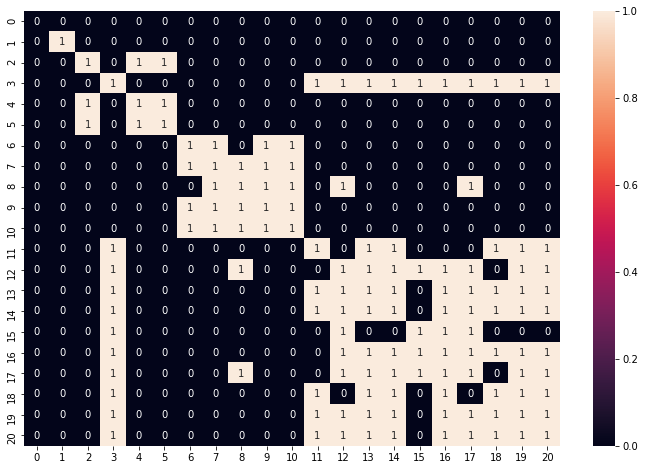

In [ ]:
plt.figure(figsize=(12,8))
corr_mat_f = np.corrcoef(dfX_f,rowvar=False)

sns.heatmap(abs(corr_mat_f)>0.7,annot=True)

[23.5369324   5.1079817   3.5171177   1.4916853   0.86984344]


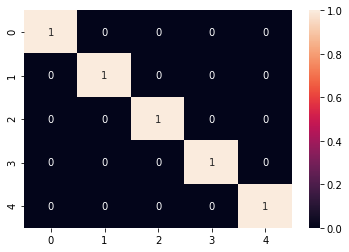

In [ ]:
decomCO = PCA(n_components=5)
decomCO.fit(dfX_f)
dfX_f = decomCO.transform(dfX_f)
dfX_test = decomCO.transform(dfX_test)
print(decomCO.explained_variance_)
sns.heatmap(np.corrcoef(dfX_f, rowvar=False)>0.1,annot=True)

In [ ]:
dfX_f.shape

(22111, 5)

In [ ]:
# Linear Regression # ----> Final
LRmodelCO = LinearRegression(fit_intercept=True)
LRmodelCO.fit(dfX_f,dfY_f)

yhatST = LRmodelCO.predict(dfX_f)  # prediction on train data
yhatST_test = LRmodelCO.predict(dfX_test) # prediction on test data


MSE_ST = mean_squared_error(yhatST, dfY_f)  # MSE train
MSE_ST_t = mean_squared_error(yhatST_test, dfY_test)  # MSE test

R_ST = r2_score(dfY_f,yhatST)  # train R_square
R_ST_t = r2_score(dfY_test, yhatST_test)  # test R_square

print("RMSE train    : ",np.sqrt(MSE_ST),"\tRMSE test      : ", np.sqrt(MSE_ST_t))
print("R_square train: ",R_ST,        "\tR_square test  : ",R_ST_t)
LRmodelCO.coef_

RMSE train    :  1.2102805721505552 	RMSE test      :  1.4187374047114432
R_square train:  0.6531762364807261 	R_square test  :  0.5813332472405408


array([-0.01411737,  0.59073902, -0.32073844,  0.23216149,  0.78006596])

In [ ]:
# Decision Tree regression model
dtrCO = DecisionTreeRegressor(max_depth=4, criterion='mse', random_state=126865488)
dtrCO.fit(dfX_f,dfY_f)

R_tr = dtrCO.score(dfX_f,dfY_f)  # train R_square
R_t = dtrCO.score(dfX_test,dfY_test)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.6708108340503138 	R_square test  :  0.5145532211228915


In [ ]:
RTr_list = []
RT_list = []
for i in range(1,20):
    rfRegCO = RandomForestRegressor(max_depth=i,n_estimators=100,n_jobs=-1, criterion='mse',max_features=3,
                             warm_start=True,oob_score=True, bootstrap=True, random_state=1255634)
    rfRegCO.fit(dfX_f,dfY_f)


    R_tr = rfRegCO.score(dfX_f,dfY_f)  # train R_square
    RTr_list.append(R_tr)
    R_test = rfRegCO.score(dfX_test,dfY_test)  # test R_square
    RT_list.append(R_test)

    print('depth: ',i,"R_square train: ",R_tr,        "\tR_square test  : ",R_test)

depth:  1 R_square train:  0.4330251817655878 	R_square test  :  0.3899759762179652
depth:  2 R_square train:  0.574493646332948 	R_square test  :  0.49925627455692084
depth:  3 R_square train:  0.651866212727901 	R_square test  :  0.5500811970852879
depth:  4 R_square train:  0.7113462315168892 	R_square test  :  0.5826114825445419
depth:  5 R_square train:  0.7458636724012067 	R_square test  :  0.5932832046643586
depth:  6 R_square train:  0.7776079783228439 	R_square test  :  0.5993452012641024
depth:  7 R_square train:  0.8038222420032081 	R_square test  :  0.5987339985278128
depth:  8 R_square train:  0.8224726663969795 	R_square test  :  0.6012749728585617
depth:  9 R_square train:  0.8411411467238186 	R_square test  :  0.6019223232415525
depth:  10 R_square train:  0.8568968902615546 	R_square test  :  0.5962872561095423
depth:  11 R_square train:  0.8707209264643949 	R_square test  :  0.5788867086026189
depth:  12 R_square train:  0.8827655058930676 	R_square test  :  0.5842631

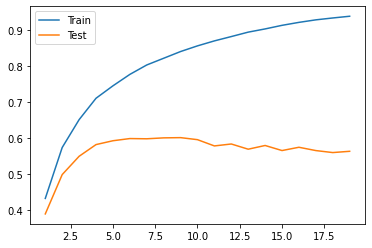

9 0.6019223232415525


In [ ]:
xaxis = list(range(1,20))
plt.plot(xaxis,RTr_list)
plt.plot(xaxis,RT_list)
plt.legend(['Train', 'Test'])
plt.show()
print(RT_list.index((max(RT_list)))+1,max(RT_list))

In [ ]:
# Random forest
rfRegCO = RandomForestRegressor(max_depth=6,n_estimators=100,n_jobs=-1, criterion='mse',max_features=3,
                             warm_start=True,oob_score=True, bootstrap=True, random_state=1255634)
rfRegCO.fit(dfX_f,dfY_f)


R_tr = rfRegCO.score(dfX_f,dfY_f)  # train R_square
R_test = rfRegCO.score(dfX_test,dfY_test)  # test R_square
print("R_square train: ",R_tr,        "\tR_square test  : ",R_test)

R_square train:  0.7776079783228439 	R_square test  :  0.5993452012641025


In [ ]:
# Support Vector
svRegrCO = SVR(C=0.06,epsilon=0.1,kernel='poly', degree=1)
svRegrCO.fit(dfX_f,dfY_f)

R_tr = svRegrCO.score(dfX_f,dfY_f)  # train R_square
R_t = svRegrCO.score(dfX_test,dfY_test)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.6361477078812998 	R_square test  :  0.6020574056125648


### Final Training of SVM Regressor over all the data

(36674, 11)
(36674, 11)
(36674, 5) (36674,)
[19.88973833  4.89380822  3.13151023  1.11360305  0.64996645]


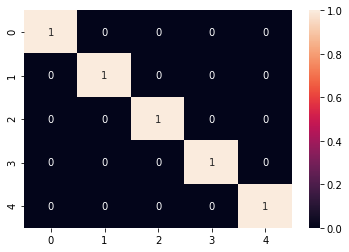

In [ ]:
## Data for final training

# =============loading train data ===================
df_f = pd.concat([df_f, df_test_CO]).reset_index(drop =True)
print(df_f.shape)

#===================================================

# Shuffling Data
df_f = shuffle(df_f)
print(df_f.shape)
# ==================================================

# ========Selecting predictor columns===============
X_cols = df_f.drop(columns=['AP','TIT', 'AT','AH','CO','NOX']).columns[:]
#===================================================

# =============data slicing=========================
# train data
dfX_f = df_f.loc[:,X_cols]
dfY_f = df_f.loc[:,y_cols]


# ===================data scale=====================
scalerCO = StandardScaler()
scalerCO.fit(dfX_f)
dfX_f_t = scalerCO.transform(dfX_f)
dfX_f = pd.DataFrame(data = dfX_f_t, columns=X_cols).reset_index(drop=True)

#===================================================
print(dfX_f.shape,dfY_f.shape)
y_cols
#_______________________________________________________________________________


# Polynomial features  # Reqired to do this
from sklearn.preprocessing import PolynomialFeatures
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(dfX_f)
dfX_f = poly.transform(dfX_f)
#_______________________________________________________________________________


decomCO = PCA(n_components=5)
decomCO.fit(dfX_f)
dfX_f = decomCO.transform(dfX_f)
print(decomCO.explained_variance_)
sns.heatmap(np.corrcoef(dfX_f, rowvar=False)>0.1,annot=True)


In [ ]:
# Support Vector
svRegrCO = SVR(C=0.06,epsilon=0.1,kernel='poly', degree=1)
svRegrCO.fit(dfX_f,dfY_f)

R_tr = svRegrCO.score(dfX_f,dfY_f)  # train R_square
R_t = svRegrCO.score(dfX_test,dfY_test)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.6280521710153952 	R_square test  :  0.6133194260040608


In [ ]:
# svRegrCO.coef_

## NOX PREDICTION

#### Loading Data

In [ ]:
# path of each file
path_train_NOX = ("/content/drive/MyDrive/Colab Notebooks/Stats_AND_ML_Projects/"
        "ML_Project/Gas Turbine CO and NOx Emission Data Set Data Set/"
        "pp_gas_emission/train_NOX.csv")

path_CV_NOX = ("/content/drive/MyDrive/Colab Notebooks/Stats_AND_ML_Projects/"
        "ML_Project/Gas Turbine CO and NOx Emission Data Set Data Set/"
        "pp_gas_emission/CV_NOX.csv")

# ===========================================================

df_train_NOX = pd.read_csv(path_train_NOX)
df_CV_NOX = pd.read_csv(path_CV_NOX)

#### Statistical Analysis

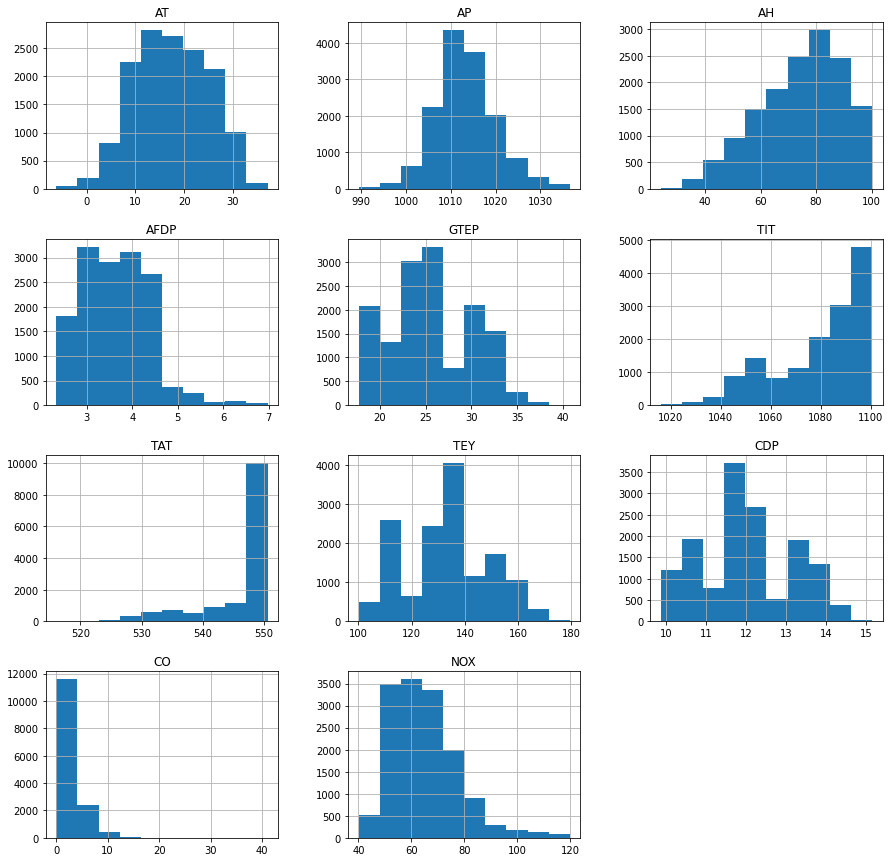

In [ ]:
df_train_NOX.hist(figsize=(15,15))
plt.show()

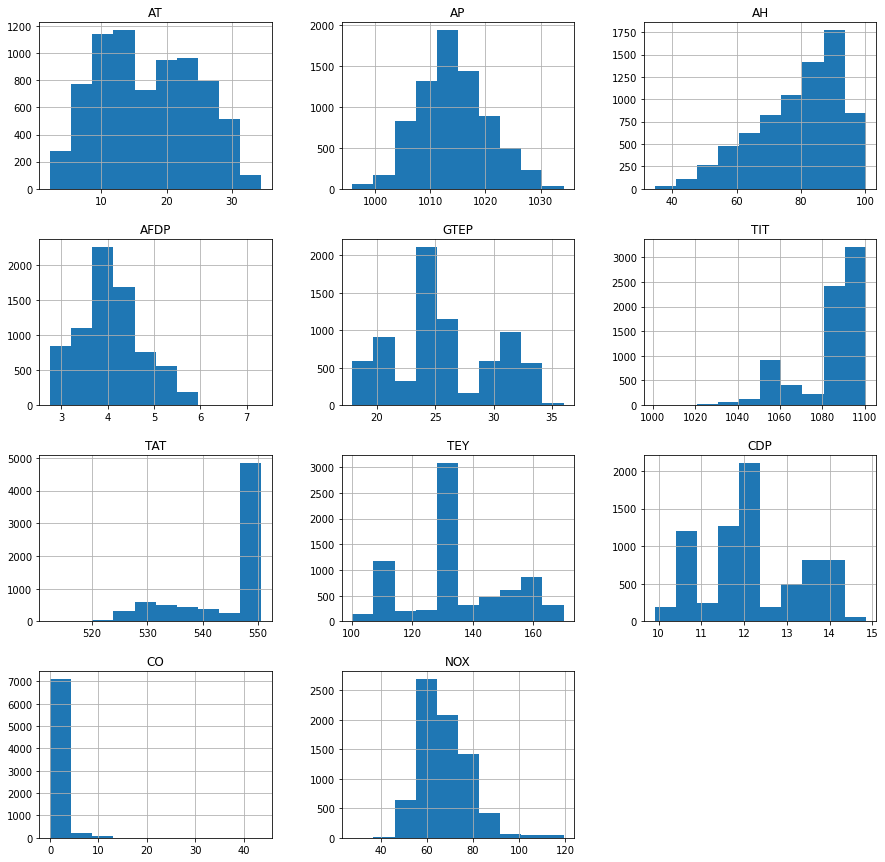

In [ ]:
df_CV_NOX.hist(figsize=(15,15))
plt.show()

In [ ]:
df_train_NOX.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000
mean,17.407717,1013.274244,74.463483,3.646490,25.625360,1080.248541,546.217855,133.093817,12.035166,2.927842,64.880303
std,7.516088,6.723767,15.038853,0.714908,4.443661,18.677587,6.491866,16.289750,1.136243,2.302914,12.636047
min,-6.234800,989.380000,24.085000,2.329500,17.698000,1016.000000,516.040000,100.020000,9.870800,0.005033,40.039000
25%,11.592750,1009.000000,64.146000,3.108825,22.731500,1068.600000,544.560000,122.750000,11.280000,1.509900,55.299250
50%,17.314000,1012.700000,76.519000,3.582600,25.011500,1085.100000,549.830000,133.355000,11.949000,2.148050,63.259500
75%,23.415000,1017.300000,85.953250,4.170650,29.709000,1099.500000,550.030000,146.060000,13.063000,3.676725,71.835000
max,37.103000,1036.600000,100.190000,6.977900,40.716000,1100.500000,550.590000,179.500000,15.159000,41.097000,119.910000


In [ ]:
df_CV_NOX.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000
mean,17.112261,1014.167883,79.174989,4.090755,25.663721,1084.733909,544.503170,135.745675,12.207578,1.572486,67.575392
std,7.428307,6.293003,13.465898,0.661865,4.325835,16.134972,8.288471,16.209187,1.146561,1.845442,10.683331
min,2.116300,995.790000,34.493000,2.758400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,10.992000,1009.800000,70.428500,3.644750,23.364500,1082.500000,538.560000,130.745000,11.684000,0.726405,60.361500
50%,16.366000,1013.600000,82.129000,4.026300,24.770000,1088.000000,549.860000,133.810000,12.008000,1.155700,65.542000
75%,23.344500,1018.100000,89.778000,4.480350,29.879500,1099.800000,550.040000,148.325000,13.257000,1.754600,74.314500
max,34.532000,1034.200000,100.170000,7.318900,36.003000,1100.600000,550.610000,170.000000,14.851000,43.622000,119.320000


#### Feature and traget variable split

In [ ]:
# Shuffling Data
df_train_NOX = shuffle(df_train_NOX)
print(df_train_NOX.shape)
print(df_CV_NOX.shape)
# =============================================

# ========Selecting predictor columns==========

X_cols = df_train_NOX.drop(columns=['AFDP','GTEP','TAT','NOX','CO']).columns[:] # as per paper
y_cols = df_train_NOX.columns[-1]
#==============================================

# =============data slicing====================
# train data
dfX_tr = df_train_NOX.loc[:,X_cols]
dfY_tr = df_train_NOX.loc[:,y_cols]

# CV data
dfX_CV = df_CV_NOX.loc[:,X_cols]
dfY_CV = df_CV_NOX.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scaler = StandardScaler()
scaler.fit(dfX_tr)
dfX_tr_t = scaler.transform(dfX_tr)
dfX_tr = pd.DataFrame(data = dfX_tr_t, columns=X_cols).reset_index(drop=True)

# CV data Scale
dfX_CV_t = scaler.transform(dfX_CV)
dfX_CV = pd.DataFrame(data = dfX_CV_t, columns=X_cols).reset_index(drop=True)

#==============================================
print(dfX_tr.shape,dfY_tr.shape,dfX_CV.shape,dfY_CV.shape)
y_cols

(14530, 11)
(7411, 11)
(14530, 6) (14530,) (7411, 6) (7411,)


'NOX'

In [ ]:
dfX_tr.head(2)

,AT,AP,AH,TIT,TEY,CDP
0,-0.320752,1.104442,-0.473688,0.447153,0.104129,-0.076717
1,1.153603,-0.100281,-0.311835,0.163381,-0.079428,-0.031831


In [ ]:
# Polynomial features  # Reqired to do this
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(dfX_tr)
dfX_tr = poly.transform(dfX_tr)

poly2 = PolynomialFeatures(degree=deg)
poly2.fit(dfX_CV)
dfX_CV = poly2.transform(dfX_CV)
dfX_tr.shape, dfX_CV.shape

((14530, 28), (7411, 28))

### LINEAR REGRESSION

In [ ]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(dfX_tr,dfY_tr)

yhat = lr.predict(dfX_tr)  # prediction on train data
yhat_CV = lr.predict(dfX_CV) # prediction on CV data

mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV

R_tr = r2_score(dfY_tr,yhat)  # train R_square
R_CV = r2_score(dfY_CV, yhat_CV)  # CV R_square


# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

lr.coef_

RMSE train    :  7.307758559903443 	RMSE CV      :  6.86195094460339
R_square train:  0.6655156431147471 	R_square CV  :  0.5873893617701984
Adjusted_R_square train:  0.6648697868294711 	Adjusted_R_square CV  :  0.5858243254832254


array([-1.19453043e-14, -1.70293798e+01, -1.68874131e+00, -1.52734551e+00,
        2.70249628e+01, -5.12536662e+01,  2.57280401e+01,  2.32790454e+00,
        2.85966518e+00, -1.48156529e+00, -5.02006362e+00,  2.24786527e+01,
       -1.39213051e+01,  5.04908159e-01,  2.07425451e-01, -1.76639001e+00,
        4.64988634e+00, -3.50605881e+00,  8.77741643e-01, -2.49573932e+00,
       -9.60961288e+00,  1.29407486e+01,  1.96643281e+01, -1.94229343e+01,
       -1.54204545e+01,  7.38727709e+01, -1.25927460e+02,  7.06914903e+01])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


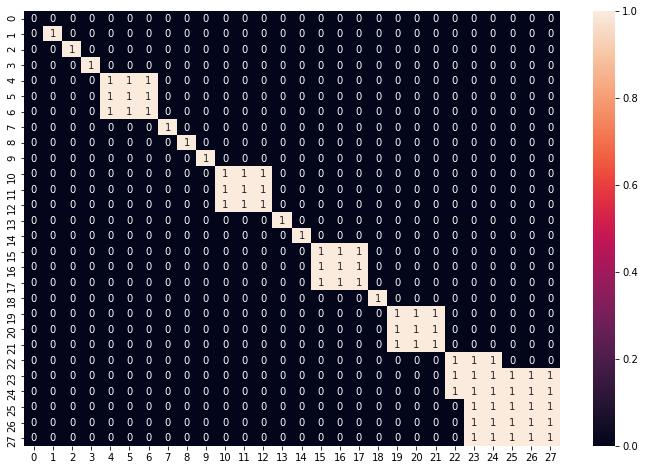

In [ ]:
plt.figure(figsize=(12,8))
corr_mat = np.corrcoef(dfX_tr,rowvar=False)

sns.heatmap(abs(corr_mat)>0.7,annot=True)


[7.76709972e+00 5.77010596e+00 3.78688022e+00 3.17894886e+00
 2.90286339e+00 1.96447487e+00 1.46925981e+00 1.26945313e+00
 9.44940582e-01 8.38623580e-01 7.48951851e-01 3.84910337e-01
 3.64049462e-01 1.76031873e-01 1.52856103e-01 8.75091665e-02
 6.54400679e-02 2.36992380e-02 1.59600368e-02 8.23410681e-03
 3.04091588e-03 2.61337770e-03]


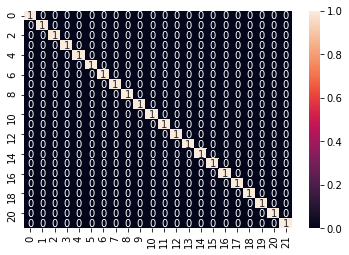

In [ ]:
decom = PCA(n_components=22)
decom.fit(dfX_tr)
dfX_tr = decom.transform(dfX_tr)
dfX_CV = decom.transform(dfX_CV)
print(decom.explained_variance_)
sns.heatmap(np.corrcoef(dfX_tr, rowvar=False)>0.1,annot=True)


In [ ]:
dfX_tr.shape

(14530, 22)

In [ ]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(dfX_tr,dfY_tr)

yhat = lr.predict(dfX_tr)  # prediction on train data
yhat_CV = lr.predict(dfX_CV) # prediction on CV data

mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV

R_tr = r2_score(dfY_tr,yhat)  # train R_square
R_CV = r2_score(dfY_CV, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

lr.coef_

RMSE train    :  7.648032308627918 	RMSE CV      :  6.724456610309836
R_square train:  0.633641005186068 	R_square CV  :  0.6037588327298897
Adjusted_R_square train:  0.633085418373777 	Adjusted_R_square CV  :  0.6025789050525829


array([  0.36476058,   1.62552691,  -0.73078952,  -0.05587186,
         1.97823377,  -0.32385277,  -0.2592184 ,   0.91307075,
         6.23884317,   0.48073694,   0.63545821,  -0.90734202,
         4.36262571,   5.94927459,  -0.56836426,  -4.31923916,
        -0.8961885 ,   2.18679655, -27.32674067,  -0.69710288,
         3.16522415,  46.22804409])

### RIDGE

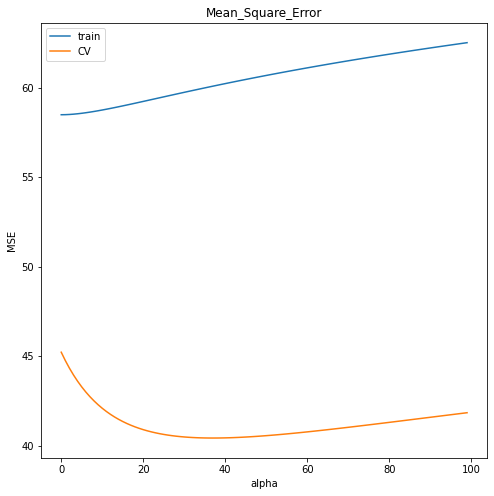

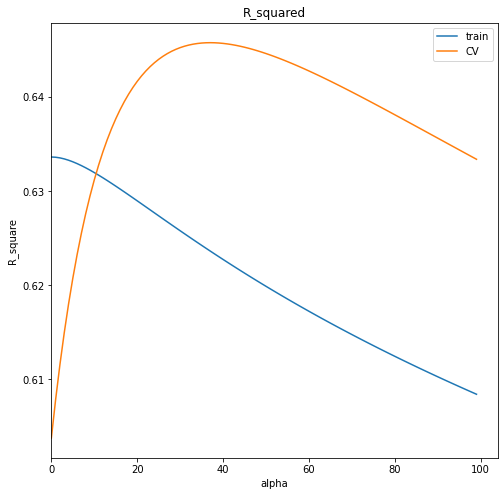

0 0.633641005186068
37 0.645797443828894


In [ ]:
# Ridge Regression
mse_tr_list = []
mse_CV_list = []

R_tr_list = []
R_CV_list = []

for alpha in range(0,100):
    ridg = Ridge(alpha=alpha, fit_intercept=True,max_iter=None, solver='auto')
    ridg.fit(dfX_tr,dfY_tr)

    yhat = ridg.predict(dfX_tr)  # prediction on train data
    yhat_CV = ridg.predict(dfX_CV) # prediction on CV data


    mse = mean_squared_error(yhat, dfY_tr)  # MSE train
    mse_tr_list.append(mse)

    mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV
    mse_CV_list.append(mse_CV)


    R_tr = ridg.score(dfX_tr,dfY_tr)  # train R_square
    R_tr_list.append(R_tr)

    R_CV = ridg.score(dfX_CV,dfY_CV)  # CV R_square
    R_CV_list.append(R_CV)
    

plt.figure(figsize=(8,8))
plt.plot(mse_tr_list)
plt.plot(mse_CV_list)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.legend(['train', 'CV'])
plt.title("Mean_Square_Error")
plt.show()



plt.figure(figsize=(8,8))
plt.plot(R_tr_list)
plt.plot(R_CV_list)
plt.title("R_squared")

plt.xlabel("alpha")
plt.legend(['train', 'CV'])
plt.ylabel("R_square")
plt.xlim(0,)
plt.show()


print(R_tr_list.index(max(R_tr_list)), max(R_tr_list))
print(R_CV_list.index(max(R_CV_list)), max(R_CV_list))

In [ ]:
ridg = Ridge(alpha=37, fit_intercept=True,max_iter=None, solver='auto')
ridg.fit(dfX_tr,dfY_tr)

yhat = ridg.predict(dfX_tr)  # prediction on train data
yhat_CV = ridg.predict(dfX_CV) # prediction on CV data


mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV
R_tr = ridg.score(dfX_tr,dfY_tr)  # train R_square
R_CV = ridg.score(dfX_CV,dfY_CV)  # CV R_square

print(np.sqrt(mse),np.sqrt(mse_CV))
print(R_tr,R_CV)

7.751722996531928 6.35774703456005
0.6236396003548279 0.645797443828895


### DECISION TREE

In [ ]:
# Decision Tree regression model
dtr = DecisionTreeRegressor(max_depth=7, criterion='mse', random_state=126865488)
dtr.fit(dfX_tr,dfY_tr)

R_tr = dtr.score(dfX_tr,dfY_tr)  # train R_square
R_CV = dtr.score(dfX_CV,dfY_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

R_square train:  0.7036445365857491 	R_square CV  :  0.5974428966259923
Adjusted_R_square train:  0.7031951107778553 	Adjusted_R_square CV  :  0.5962441613425288


### RANDOM FOREST

In [ ]:
for i in range(1,18):
    rfReg = RandomForestRegressor(max_depth=i,n_estimators=100,n_jobs=-1, criterion='mse',
                                warm_start=True,oob_score=True, bootstrap=True,
                                  max_features=7, random_state=126865488)
    rfReg.fit(dfX_tr,dfY_tr)


    R_tr = rfReg.score(dfX_tr,dfY_tr)  # train R_square
    R_CV = rfReg.score(dfX_CV,dfY_CV)  # CV R_square
    print(i,"--","R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)

1 -- R_square train:  0.2517380096048746 	R_square CV  :  0.22969238368207368
2 -- R_square train:  0.40521458440056546 	R_square CV  :  0.4280374762142325
3 -- R_square train:  0.5066399477459897 	R_square CV  :  0.5482332088364894
4 -- R_square train:  0.5749365506602128 	R_square CV  :  0.6053811643480707
5 -- R_square train:  0.6419117748305582 	R_square CV  :  0.6596096913262138
6 -- R_square train:  0.6954273904987966 	R_square CV  :  0.6697310533957793
7 -- R_square train:  0.7425160796322741 	R_square CV  :  0.6840736503010969
8 -- R_square train:  0.7836171621264146 	R_square CV  :  0.6890174135183172
9 -- R_square train:  0.8202456833246137 	R_square CV  :  0.6883347302927649
10 -- R_square train:  0.8511708290995115 	R_square CV  :  0.6875210068041288
11 -- R_square train:  0.8769289438322936 	R_square CV  :  0.6856437434075023
12 -- R_square train:  0.8980345529958836 	R_square CV  :  0.6854360803415068
13 -- R_square train:  0.9155153794148831 	R_square CV  :  0.6786776510

In [ ]:
rfReg = RandomForestRegressor(max_depth=6,n_estimators=100,n_jobs=-1, criterion='mse',
                                warm_start=True,oob_score=True, bootstrap=True,
                                  max_features=7, random_state=126865488)
rfReg.fit(dfX_tr,dfY_tr)


R_tr = rfReg.score(dfX_tr,dfY_tr)  # train R_square
R_CV = rfReg.score(dfX_CV,dfY_CV)  # CV R_square
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)

R_square train:  0.6954273904987966 	R_square CV  :  0.6697310533957793


### SUPPORT VECTOR

In [ ]:
svRegr = SVR(C=2,epsilon=0.1,kernel='rbf') #--> Final
svRegr.fit(dfX_tr, dfY_tr)

R_tr = svRegr.score(dfX_tr,dfY_tr)  # train R_square
R_CV = svRegr.score(dfX_CV,dfY_CV)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)

R_square train:  0.7126041022840071 	R_square CV  :  0.5346096883484588


### FINAL TRAINING ON BOTH TRAIN AND CV DATA


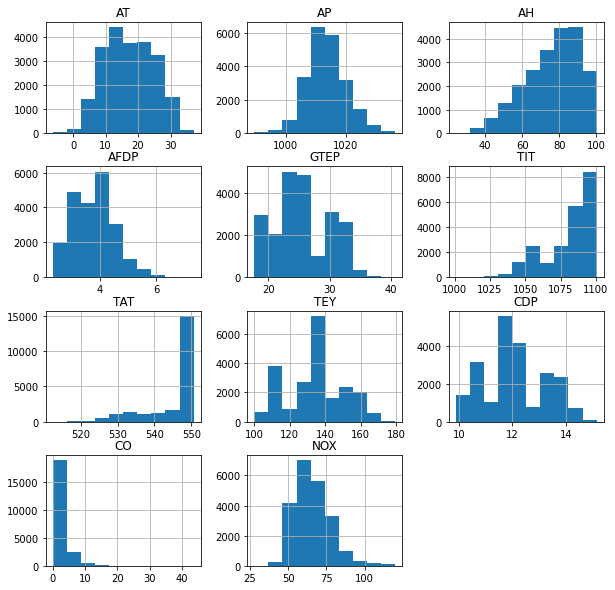

In [ ]:
df_f_NOX = pd.concat([df_train_NOX,df_CV_NOX]).reset_index(drop =True)
df_f_NOX.hist(figsize=(10,10))
plt.show()

(14786, 11)


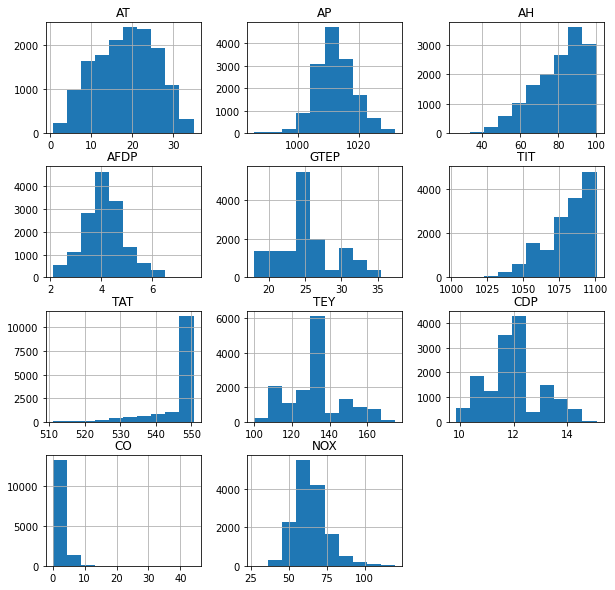

In [ ]:
path_test_NOX = ("/content/drive/MyDrive/Colab Notebooks/Stats_AND_ML_Projects/"
        "ML_Project/Gas Turbine CO and NOx Emission Data Set Data Set/"
        "pp_gas_emission/test_NOX.csv")

# =============loading test data ===================
df_test_NOX = pd.read_csv(path_test_NOX)
print(df_test_NOX.shape)
# ===========================================================
df_test_NOX.hist(figsize=(10,10))
plt.show()

In [ ]:
# Shuffling Data
df_f_NOX = shuffle(df_f_NOX)
print(df_f_NOX.shape)
# =============================================

# ========Selecting predictor columns==========
X_cols = df_f_NOX.drop(columns=['AFDP','GTEP','TAT','NOX','CO']).columns[:] # as per paper
y_cols = df_f_NOX.columns[-1]
#==============================================

# =============data slicing====================
# train data
dfX_f_NOX = df_f_NOX.loc[:,X_cols]
dfY_f_NOX = df_f_NOX.loc[:,y_cols]

# test data
dfX_test_NOX = df_test_NOX.loc[:,X_cols]
dfY_test_NOX = df_test_NOX.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scalerNOX = StandardScaler()
scalerNOX.fit(dfX_f_NOX)
dfX_f_t_NOX = scalerNOX.transform(dfX_f_NOX)
dfX_f_NOX = pd.DataFrame(data = dfX_f_t_NOX, columns=X_cols).reset_index(drop=True)


# test data scale
dfX_test_t_NOX = scalerNOX.transform(dfX_test_NOX)
dfX_test_NOX = pd.DataFrame(data = dfX_test_t_NOX, columns=X_cols).reset_index(drop=True)
#==============================================
print(dfX_f_NOX.shape,dfY_f_NOX.shape, dfX_test_NOX.shape, dfY_test_NOX.shape)
y_cols

(21941, 11)
(21941, 6) (21941,) (14786, 6) (14786,)


'NOX'

In [ ]:
dfX_test_NOX.head(2)

,AT,AP,AH,TIT,TEY,CDP
0,-1.395459,-0.860706,1.411558,-1.254641,-1.182672,-1.302645
1,-1.405395,-0.784888,1.433265,-1.249081,-1.181445,-1.308771


In [ ]:
# Polynomial features  # Reqired to do this
from sklearn.preprocessing import PolynomialFeatures
deg = 2
polyNOX = PolynomialFeatures(degree=deg)
polyNOX.fit(dfX_f_NOX)
dfX_f_NOX = polyNOX.transform(dfX_f_NOX)

poly2NOX = PolynomialFeatures(degree=deg)
poly2NOX.fit(dfX_test_NOX)
dfX_test_NOX = poly2NOX.transform(dfX_test_NOX)
dfX_f_NOX.shape, dfX_test_NOX.shape

((21941, 28), (14786, 28))

In [ ]:
# Linear Regression # ----> Final
LRmodel_NOX = LinearRegression(fit_intercept=True)
LRmodel_NOX.fit(dfX_f_NOX,dfY_f_NOX)

yhatST_NOX= LRmodel_NOX.predict(dfX_f_NOX)  # prediction on train data
yhatST_test_NOX = LRmodel_NOX.predict(dfX_test_NOX) # prediction on test data


MSE_ST = mean_squared_error(yhatST_NOX, dfY_f_NOX)  # MSE train
MSE_ST_t = mean_squared_error(yhatST_test_NOX, dfY_test_NOX)  # MSE test

R_ST = r2_score(dfY_f_NOX,yhatST_NOX)  # train R_square
R_ST_t = r2_score(dfY_test_NOX, yhatST_test_NOX)  # test R_square

print("RMSE train    : ",np.sqrt(MSE_ST),"\tRMSE test      : ", np.sqrt(MSE_ST_t))
print("R_square train: ",R_ST,        "\tR_square test  : ",R_ST_t)
LRmodel_NOX.coef_

RMSE train    :  6.9360204624550015 	RMSE test      :  6.8836806846088905
R_square train:  0.6702674230512161 	R_square test  :  0.608579745825198


array([-9.79205897e-15, -1.54444703e+01, -1.06721736e+00, -1.55203628e+00,
        2.45075925e+01, -3.92068262e+01,  1.58509425e+01,  3.89945240e-01,
        2.16237629e+00, -1.10801765e+00,  9.05877635e-01,  7.93211174e+00,
       -4.84769217e+00,  5.76678052e-01,  5.04758341e-01, -1.15961883e+00,
        3.38391354e+00, -2.84246750e+00,  5.40193565e-01, -2.33600701e+00,
       -2.01917014e+00,  4.77163147e+00,  1.00962174e+01,  4.28880278e+00,
       -2.06392752e+01,  2.94762965e+01, -5.58146092e+01,  3.66283390e+01])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


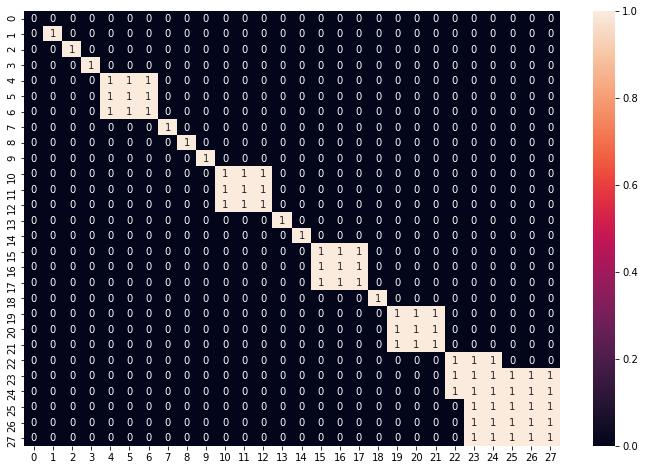

In [ ]:
plt.figure(figsize=(12,8))
corr_mat_f = np.corrcoef(dfX_f_NOX,rowvar=False)
sns.heatmap(abs(corr_mat_f)>0.7,annot=True)

[7.77736881 5.64460197 3.62892715 3.07890855 2.84037699 2.10166791
 1.35867945 1.2031484  0.96617856 0.8288396  0.70988994 0.37637272
 0.34770952 0.21333137 0.13538081 0.11055434 0.07458218 0.02554132
 0.01585954]


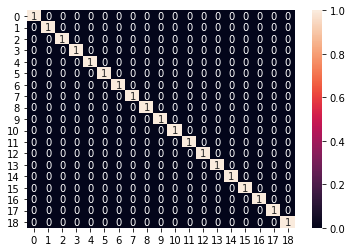

In [ ]:
decomNOX = PCA(n_components=19)
decomNOX.fit(dfX_f_NOX)
dfX_f_NOX = decomNOX.transform(dfX_f_NOX)
dfX_test_NOX = decomNOX.transform(dfX_test_NOX)
print(decomNOX.explained_variance_)
sns.heatmap(np.corrcoef(dfX_f_NOX, rowvar=False)>0.1,annot=True)

In [ ]:
dfX_f_NOX.shape

(21941, 19)

In [ ]:
# Linear Regression # ----> Final
LRmodel_NOX = LinearRegression(fit_intercept=True)
LRmodel_NOX.fit(dfX_f_NOX,dfY_f_NOX)

yhatST = LRmodel_NOX.predict(dfX_f_NOX)  # prediction on train data
yhatST_test = LRmodel_NOX.predict(dfX_test_NOX) # prediction on test data


MSE_ST = mean_squared_error(yhatST, dfY_f_NOX)  # MSE train
MSE_ST_t = mean_squared_error(yhatST_test, dfY_test_NOX)  # MSE test

R_ST = r2_score(dfY_f_NOX,yhatST)  # train R_square
R_ST_t = r2_score(dfY_test_NOX, yhatST_test)  # test R_square

print("RMSE train    : ",np.sqrt(MSE_ST),"\tRMSE test      : ", np.sqrt(MSE_ST_t))
print("R_square train: ",R_ST,        "\tR_square test  : ",R_ST_t)
LRmodel_NOX.coef_

RMSE train    :  7.375750366136695 	RMSE test      :  7.064493984952258
R_square train:  0.6271333470392623 	R_square test  :  0.5877468514228885


array([ 3.64661191e-01,  1.37384993e+00, -7.69511938e-01, -5.46981245e-03,
        2.33192723e+00, -4.07720040e-01, -1.12034684e+00,  5.75990580e-01,
        5.95998166e+00, -7.94575163e-01,  6.44382112e-01, -1.18980384e+00,
        3.97618558e+00,  5.41983294e+00, -1.86829582e+00, -1.95358052e+00,
       -1.71679713e+00,  4.72878860e-01, -2.65889667e+01])

In [ ]:
# Decision Tree regression model
dtr_NOX = DecisionTreeRegressor(max_depth=5, criterion='mse', random_state=126865488)
dtr_NOX.fit(dfX_f_NOX,dfY_f_NOX)

R_tr = dtr_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
R_t = dtr_NOX.score(dfX_test_NOX,dfY_test_NOX)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.6016792408165803 	R_square test  :  0.4230622779824087


In [ ]:
RTr_list = []
RT_list = []
for i in range(1,20):
    rfReg_NOX = RandomForestRegressor(max_depth=i,n_estimators=100,n_jobs=-1, criterion='mse',max_features=7,
                             warm_start=True,oob_score=True, bootstrap=True, random_state=126865488)
    rfReg_NOX.fit(dfX_f_NOX,dfY_f_NOX)


    R_tr = rfReg_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
    RTr_list.append(R_tr)
    R_test = rfReg_NOX.score(dfX_test_NOX,dfY_test_NOX)  # test R_square
    RT_list.append(R_test)

    print('depth: ',i,"\tR_square train: ",R_tr,        "\tR_square test  : ",R_test)

depth:  1 	R_square train:  0.2547573326216336 	R_square test  :  0.22248322348853225
depth:  2 	R_square train:  0.4073674054338695 	R_square test  :  0.3555813422952337
depth:  3 	R_square train:  0.5063670872841075 	R_square test  :  0.42638830065304256
depth:  4 	R_square train:  0.5810880977875816 	R_square test  :  0.4777191571463021
depth:  5 	R_square train:  0.6416433730251525 	R_square test  :  0.5085203616231537
depth:  6 	R_square train:  0.688276158691993 	R_square test  :  0.5303607342370948
depth:  7 	R_square train:  0.7292921800918002 	R_square test  :  0.5372467979966851
depth:  8 	R_square train:  0.7683874780900453 	R_square test  :  0.5505033550781497
depth:  9 	R_square train:  0.7991918526009486 	R_square test  :  0.5513127792051613
depth:  10 	R_square train:  0.83063455358884 	R_square test  :  0.5493991038443746
depth:  11 	R_square train:  0.8562767461205032 	R_square test  :  0.5449043392959625
depth:  12 	R_square train:  0.8800666016946505 	R_square test  

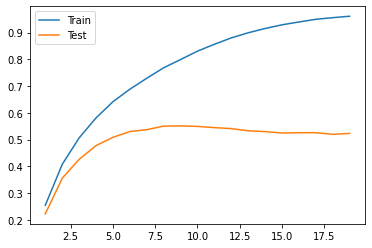

9 0.5513127792051613


In [ ]:
xaxis = list(range(1,20))
plt.plot(xaxis,RTr_list)
plt.plot(xaxis,RT_list)
plt.legend(['Train', 'Test'])
plt.show()
print(RT_list.index((max(RT_list)))+1,max(RT_list))

In [ ]:
# Random forest
rfReg_NOX = RandomForestRegressor(max_depth=6,n_estimators=100,n_jobs=-1, criterion='mse',max_features=7,
                             warm_start=True,oob_score=True, bootstrap=True, random_state=126865488)
rfReg_NOX.fit(dfX_f_NOX,dfY_f_NOX)


R_tr = rfReg_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
R_test = rfReg_NOX.score(dfX_test_NOX,dfY_test_NOX)  # test R_square
print("R_square train: ",R_tr,        "\tR_square test  : ",R_test)

R_square train:  0.688276158691993 	R_square test  :  0.5303607342370948


In [ ]:
# Support Vector
svRegr_NOX = SVR(C=2,epsilon=0.1,kernel='rbf')
svRegr_NOX.fit(dfX_f_NOX,dfY_f_NOX)

R_tr = svRegr_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
R_t = svRegr_NOX.score(dfX_test_NOX,dfY_test_NOX)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.7176283814858442 	R_square test  :  0.5870819709853918


### Final Training of SVM Regressor over all the data

(36727, 11)
(36727, 6) (36727,)
[8.29793235 5.86488848 3.67543174 3.00256723 2.8582103  2.10597803
 1.4649996  1.23152911 0.96016432 0.87369206 0.71947848 0.42662568
 0.35468827 0.25582544 0.14609901 0.12088272 0.07934128 0.02921334
 0.02411174]


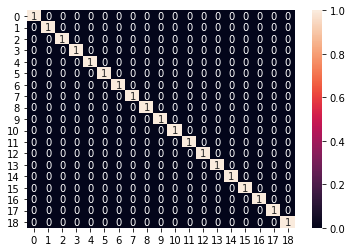

In [ ]:
df_f_NOX = pd.concat([df_f_NOX,df_test_NOX]).reset_index(drop =True)

# Shuffling Data
df_f_NOX = shuffle(df_f_NOX)
print(df_f_NOX.shape)
# =============================================

# ========Selecting predictor columns==========
X_cols = df_f_NOX.drop(columns=['AFDP','GTEP','TAT','NOX','CO']).columns[:] # as per paper
y_cols = df_f_NOX.columns[-1]
#==============================================

# =============data slicing====================
# train data
dfX_f_NOX = df_f_NOX.loc[:,X_cols]
dfY_f_NOX = df_f_NOX.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scalerNOX = StandardScaler()
scalerNOX.fit(dfX_f_NOX)
dfX_f_t_NOX = scalerNOX.transform(dfX_f_NOX)
dfX_f_NOX = pd.DataFrame(data = dfX_f_t_NOX, columns=X_cols).reset_index(drop=True)
#==============================================
print(dfX_f_NOX.shape,dfY_f_NOX.shape)
y_cols
#_______________________________________________________________________________
# Polynomial features  # Reqired to do this


from sklearn.preprocessing import PolynomialFeatures
deg = 2
polyNOX = PolynomialFeatures(degree=deg)
polyNOX.fit(dfX_f_NOX)
dfX_f_NOX = polyNOX.transform(dfX_f_NOX)
dfX_f_NOX.shape
#_______________________________________________________________________________

decomNOX = PCA(n_components=19)
decomNOX.fit(dfX_f_NOX)
dfX_f_NOX = decomNOX.transform(dfX_f_NOX)
print(decomNOX.explained_variance_)
sns.heatmap(np.corrcoef(dfX_f_NOX, rowvar=False)>0.1,annot=True)

In [ ]:
# Support Vector
svRegr_NOX = SVR(C=2,epsilon=0.1,kernel='rbf')
svRegr_NOX.fit(dfX_f_NOX,dfY_f_NOX)

R_tr = svRegr_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
R_t = svRegr_NOX.score(dfX_test_NOX,dfY_test_NOX)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.698629094836806 	R_square test  :  0.6616090376133217


# WEB APP

In [ ]:
!pip install --quiet gradio

     |████████████████████████████████| 1.6MB 8.1MB/s 
     |████████████████████████████████| 215kB 57.5MB/s 
     |████████████████████████████████| 1.9MB 45.8MB/s 
     |████████████████████████████████| 3.2MB 50.6MB/s 
     |████████████████████████████████| 962kB 50.3MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 


In [ ]:
import pickle
import gradio

In [ ]:
# Saving Models which have best R_squared
pickle.dump(svRegrCO,open('svRegrCO-model.pkl','wb'))
pickle.dump(svRegr_NOX,open('svRegr_NOX-model.pkl','wb'))

In [ ]:
# Loading the saved model
svRegCO_model = pickle.load(open('svRegrCO-model.pkl','rb'))
svRegr_NOX_model = pickle.load(open('svRegr_NOX-model.pkl','rb'))

In [ ]:
# Function to predict CO emmision

def CO_pred(AFDP, GTEP, TAT, TEY, CDP):
    x_in = np.array([AFDP, GTEP, TAT, TEY, CDP]).reshape(1,-1)
    x_in = scalerCO.transform(x_in)
    poly_CO = PolynomialFeatures(degree=2)
    poly_CO.fit(x_in)
    x_in = poly_CO.transform(x_in)
    x_in = decomCO.transform(x_in)
    pred = svRegCO_model.predict(x_in)

    return {"CO emmision in mg/m^3 :":pred[0]}

In [ ]:
# Function to predict NOX emmision

def NOX_pred(AT, AP, AH, TIT, TEY, CDP):
    x_in = np.array([AT, AP, AH, TIT, TEY, CDP]).reshape(1,-1)
    x_in = scalerNOX.transform(x_in)
    poly_NOX = PolynomialFeatures(degree=2)
    poly_NOX.fit(x_in)
    x_in = poly_NOX.transform(x_in)
    x_in = decomNOX.transform(x_in)
    pred = svRegr_NOX_model.predict(x_in)

    return {"NOX emmision in mg/m^3 :":pred[0]}

In [ ]:
CO_pred(3.1526,22.343,550.01,118.64,11.189)

{'CO emmision in mg/m^3 :': 2.835470018491951}

In [ ]:
NOX_pred(26.459,1008.0,58.096,1064.5,118.64,11.189)

{'NOX emmision in mg/m^3 :': 51.423874650803754}

In [ ]:
# AFDP, GTEP, TAT, TEY, CDP

iface = gradio.Interface(CO_pred, [gradio.inputs.Number(default=None, label="Air filter difference pressure in mbar"),
                                   gradio.inputs.Number(default=None, label="Gas turbine exhaust pressure in mbar"),
                                   gradio.inputs.Number(default=None, label="Turbine after temperature in celcius"),
                                   gradio.inputs.Number(default=None, label="Turbine energy yield in MWH"),
                                   gradio.inputs.Number(default=None, label="Compressor discharge pressure in mbar")],
                                   "key_values", description = "WEB-APP to predict the CO emmision")
iface.launch(debug=False)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://26745.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://26745.gradio.app')

In [ ]:
# AT, AP, AH, TIT, TEY, CDP

iface = gradio.Interface(NOX_pred, [gradio.inputs.Number(default=None, label="Ambient temperature in Celcius"),
                                    gradio.inputs.Number(default=None, label="Ambient pressure in mbar"),
                                    gradio.inputs.Number(default=None, label="Ambient humidity in (%)"),
                                    gradio.inputs.Number(default=None, label="Turbine inlet temperature in Celcius"),
                                    gradio.inputs.Number(default=None, label="Turbine energy yield in MWH"),
                                    gradio.inputs.Number(default=None, label="Compressor discharge pressure in mbar")],
                                    "key_values", description = "WEB-APP to predict the NOX emmision")
iface.launch(debug=False)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://19156.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://19156.gradio.app')

In [ ]:
df_train_CO.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
736,26.459,1008.0,58.096,3.1526,22.343,1064.5,550.01,118.64,11.189,2.46720,48.675
3684,12.166,1022.7,63.699,3.8545,32.263,1100.1,535.67,158.55,13.842,0.41355,49.540
4673,25.374,1006.5,81.166,4.2843,24.788,1076.9,549.92,126.85,11.780,1.81890,49.285
7127,7.869,1015.5,96.255,4.6022,33.544,1099.9,534.71,163.72,14.035,1.25440,79.489
12973,22.384,1011.2,79.890,4.2018,30.080,1100.0,544.86,148.92,13.212,1.59250,47.851


# References & Citation

Heysem Kaya, PÄ±nar TÃ¼fekci and ErdinÃ§ Uzun. 'Predicting CO and NOx emissions from gas turbines: novel data and a benchmark PEMS', Turkish Journal of Electrical Engineering & Computer Sciences, vol. 27, 2019, pp. 4783-4796, [Web Link]. Weblink: [Web Link]

Data Source : https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set#